In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import xroms
from WaterMassProperties import *

In [2]:
# ROMS file
romsfile = "../../../Downloads/nk.nc"

In [3]:
# Open with xarray and make xroms object
ds = xr.open_dataset(romsfile)
ds, xgrid = xroms.roms_dataset(ds)

In [4]:
# List CF axes that can be used for data access.
# ds.salt.cf.describe()

In [5]:
# Make subset, Skagerrak
# ds = ds.cf.isel(X=slice(300,650), Y=slice(0,300))
# maxdepth = -600.0
# resolution = 300

# # Make subset, Southern North Sea
# ds = ds.cf.isel(X=slice(0,400), Y=slice(150,1000))
# maxdepth = -400.0
# resolution = 200

# # Make subset, Norwegian Sea (deep)
# ds = ds.cf.isel(X=slice(800,2200), Y=slice(800,1100))
# maxdepth = -2000.0
# resolution = 500

# # Make subset, Barents Sea
# ds = ds.cf.isel(X=slice(2400,2720), Y=slice(0,900))
# maxdepth = -400.0
# resolution = 400

# # Make subset, Mid Norway Shelf
# ds = ds.cf.isel(X=slice(1000,1800), Y=slice(600,800))
# maxdepth = -350.0
# resolution = 350

# Make subset, Northern North Sea
ds = ds.cf.isel(X=slice(340,530), Y=slice(640,1000))
maxdepth = -260.0
resolution = 300



In [6]:
tu, z = tad(ds.salt.values, ds.temp.values, ds.z_rho.values, maxdepth, resolution)

Text(0, 0.5, 'Depth [m]')

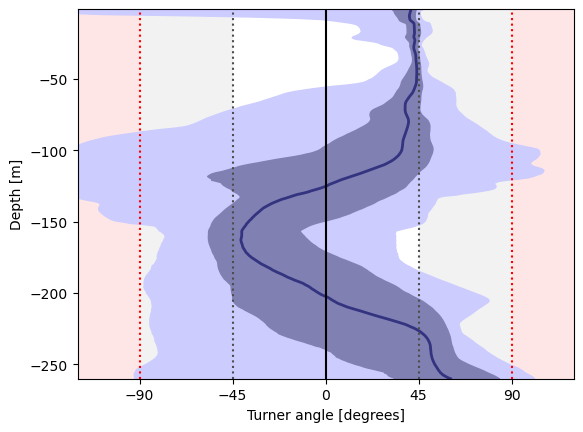

In [7]:
# Plot Turner angles
plt.subplot(1,1,1)

plt.axvspan(-120, -90, facecolor=[1.0, 0.9, 0.9])
plt.axvspan(-90, -45, facecolor='0.95')
plt.axvspan(45, 90, facecolor='0.95')
plt.axvspan(90, 120, facecolor=[1.0, 0.9, 0.9])

plt.fill_betweenx(z, tu[:,0], tu[:,4], color=[0.8, 0.8, 1.0]) 
plt.fill_betweenx(z, tu[:,1], tu[:,3], color=[0.5, 0.5, 0.7]) 
plt.plot(tu[:,2], z, color=[0.2, 0.2, 0.5], linewidth = 2)

plt.plot([0,0],[maxdepth, 0],'k-')
plt.plot([-45,-45],[maxdepth, 0], color='0.3', linestyle=':')
plt.plot([45,45],[maxdepth, 0], color='0.3', linestyle=':')
plt.plot([-90,-90],[maxdepth, 0],'r:')
plt.plot([90,90],[maxdepth, 0],'r:')

plt.xlim((-120, 120))
plt.ylim((maxdepth, -1))
plt.xticks([-90, -45, 0, 45, 90])

plt.xlabel('Turner angle [degrees]')
plt.ylabel('Depth [m]')